# Demo: Visualization of Curvelet Coefficients using Sigmoid

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from curvelops import FDCT2D

### Input data

In [2]:
inputfile = "../testdata/sigmoid.npz"

d = np.load(inputfile)
d = d["sigmoid"]
nx, nt = d.shape
dx, dt = 0.008, 0.004
x, t = np.arange(nx) * dx, np.arange(nt) * dt

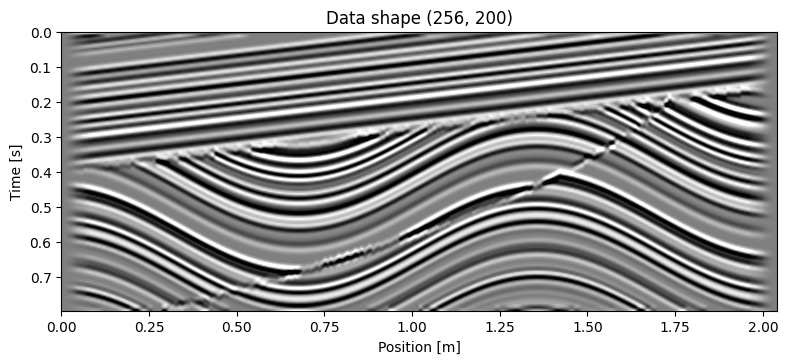

In [3]:
opts_plot = dict(
    extent=(x[0], x[-1], t[-1], t[0]), cmap="gray", interpolation="lanczos"
)
vmax = 0.5 * np.max(np.abs(d))
fig, ax = plt.subplots(figsize=(8, 6), sharey=True, sharex=True)
ax.imshow(d.T, vmin=-vmax, vmax=vmax, **opts_plot)
ax.set(xlabel="Position [m]", ylabel="Time [s]", title=f"Data shape {d.shape}")
fig.tight_layout()

### Create Curvelet Transform

In [4]:
nbscales = 4
nbangles_coarse = 8
allcurvelets = False

In [5]:
Cop = FDCT2D(
    d.shape,
    nbscales=nbscales,
    nbangles_coarse=nbangles_coarse,
    allcurvelets=allcurvelets,
)

In [6]:
d_fdct_struct = Cop.struct(Cop @ d)

#### Real part of FDCT coefficients

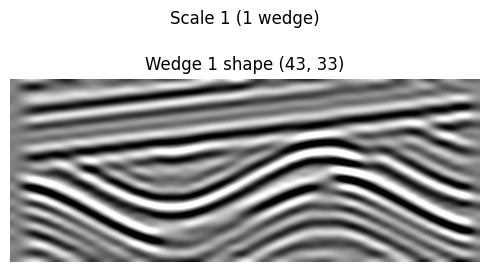

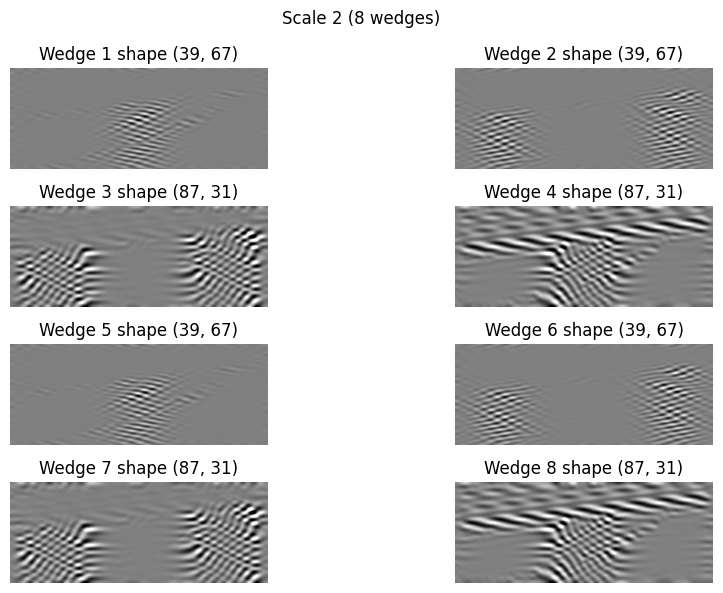

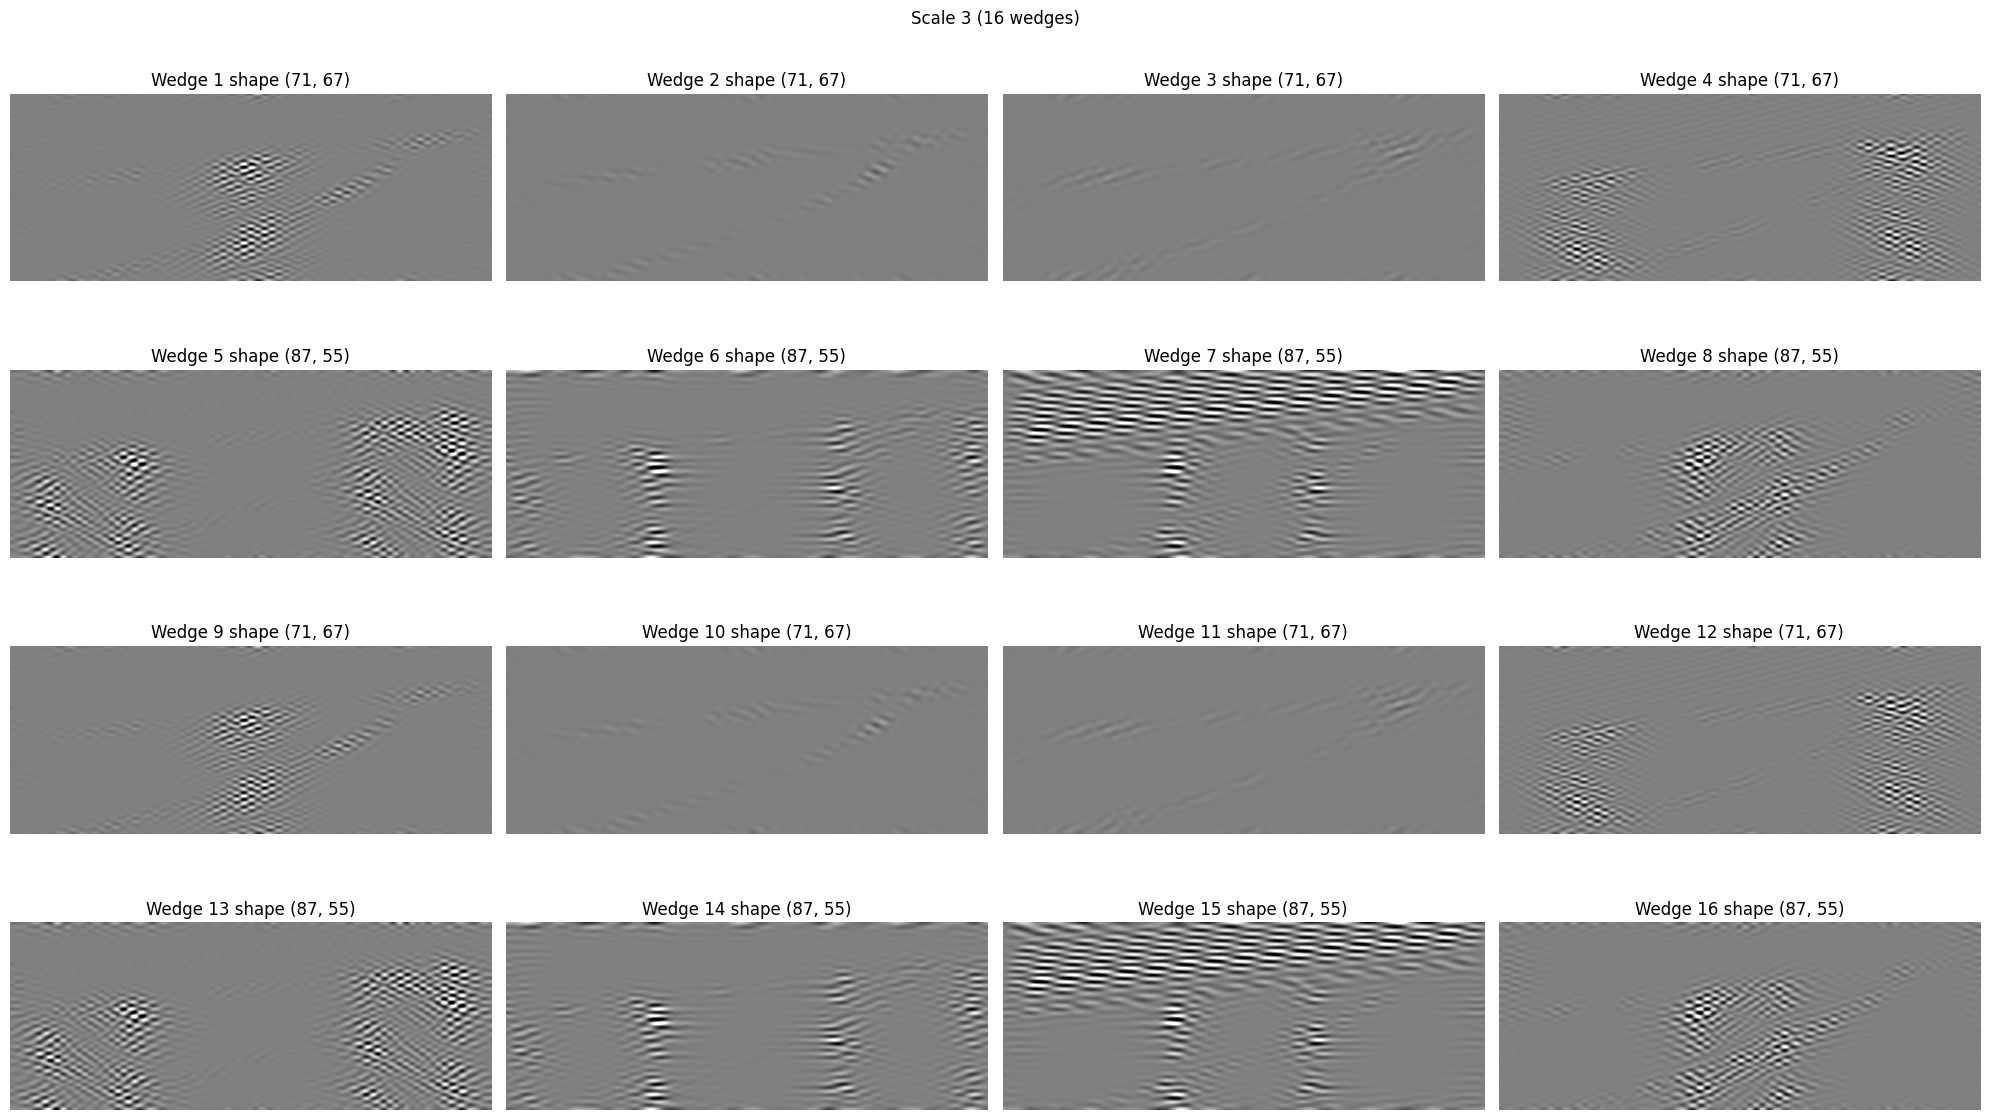

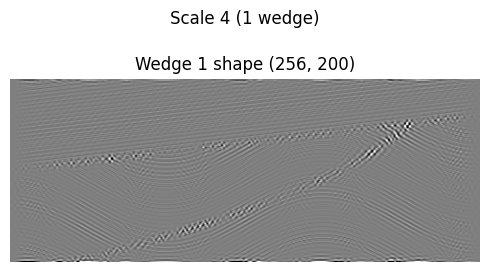

In [7]:
for j, fdct_scale in enumerate(d_fdct_struct, start=1):
    rows = int(np.floor(np.sqrt(len(fdct_scale))))
    fig, axes = plt.subplots(
        int(np.ceil(len(fdct_scale) / rows)),
        rows,
        figsize=(5 * rows, 3 * rows),
    )
    fig.suptitle(
        f"Scale {j} ({len(fdct_scale)} wedge{'s' if len(fdct_scale) > 1 else ''})"
    )
    axes = np.atleast_1d(axes).ravel()
    vmax = 0.5 * max(np.abs(Cweg).max() for Cweg in fdct_scale)
    for l, (fdct_wedge, ax) in enumerate(zip(fdct_scale, axes), start=1):
        # Note that wedges are transposed in comparison to the input vector. This is due
        # to the underlying implementation of the transform. In order to plot
        # in the same manner as the data, we must first transpose the wedge.
        # We will using the transpose of the wedge for visualization.
        c = fdct_wedge.real.T
        ax.imshow(c.T, vmin=-vmax, vmax=vmax, **opts_plot)
        ax.set(title=f"Wedge {l} shape {c.shape}")
        ax.axis("off")
    fig.tight_layout()

#### Imaginagy part of FDCT coefficients

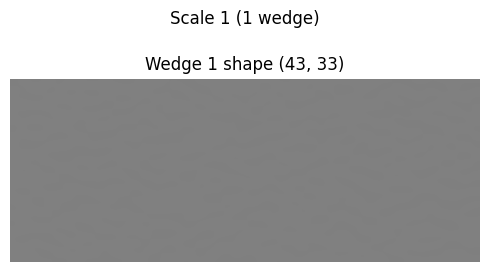

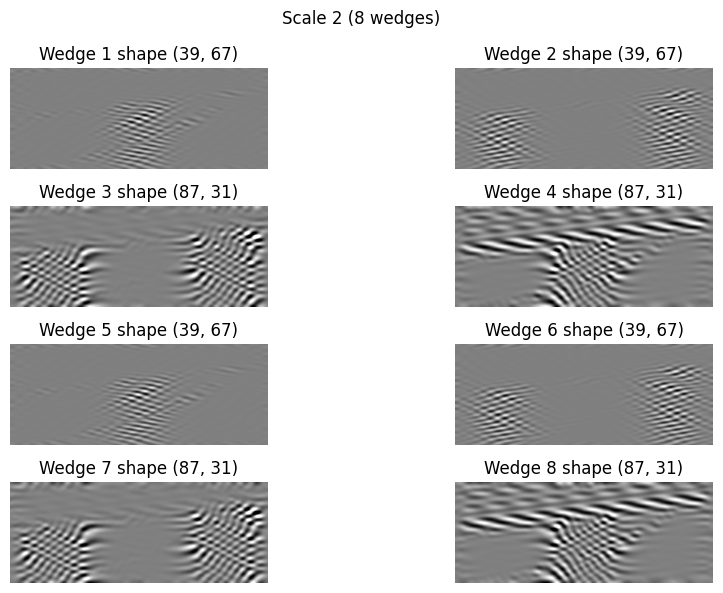

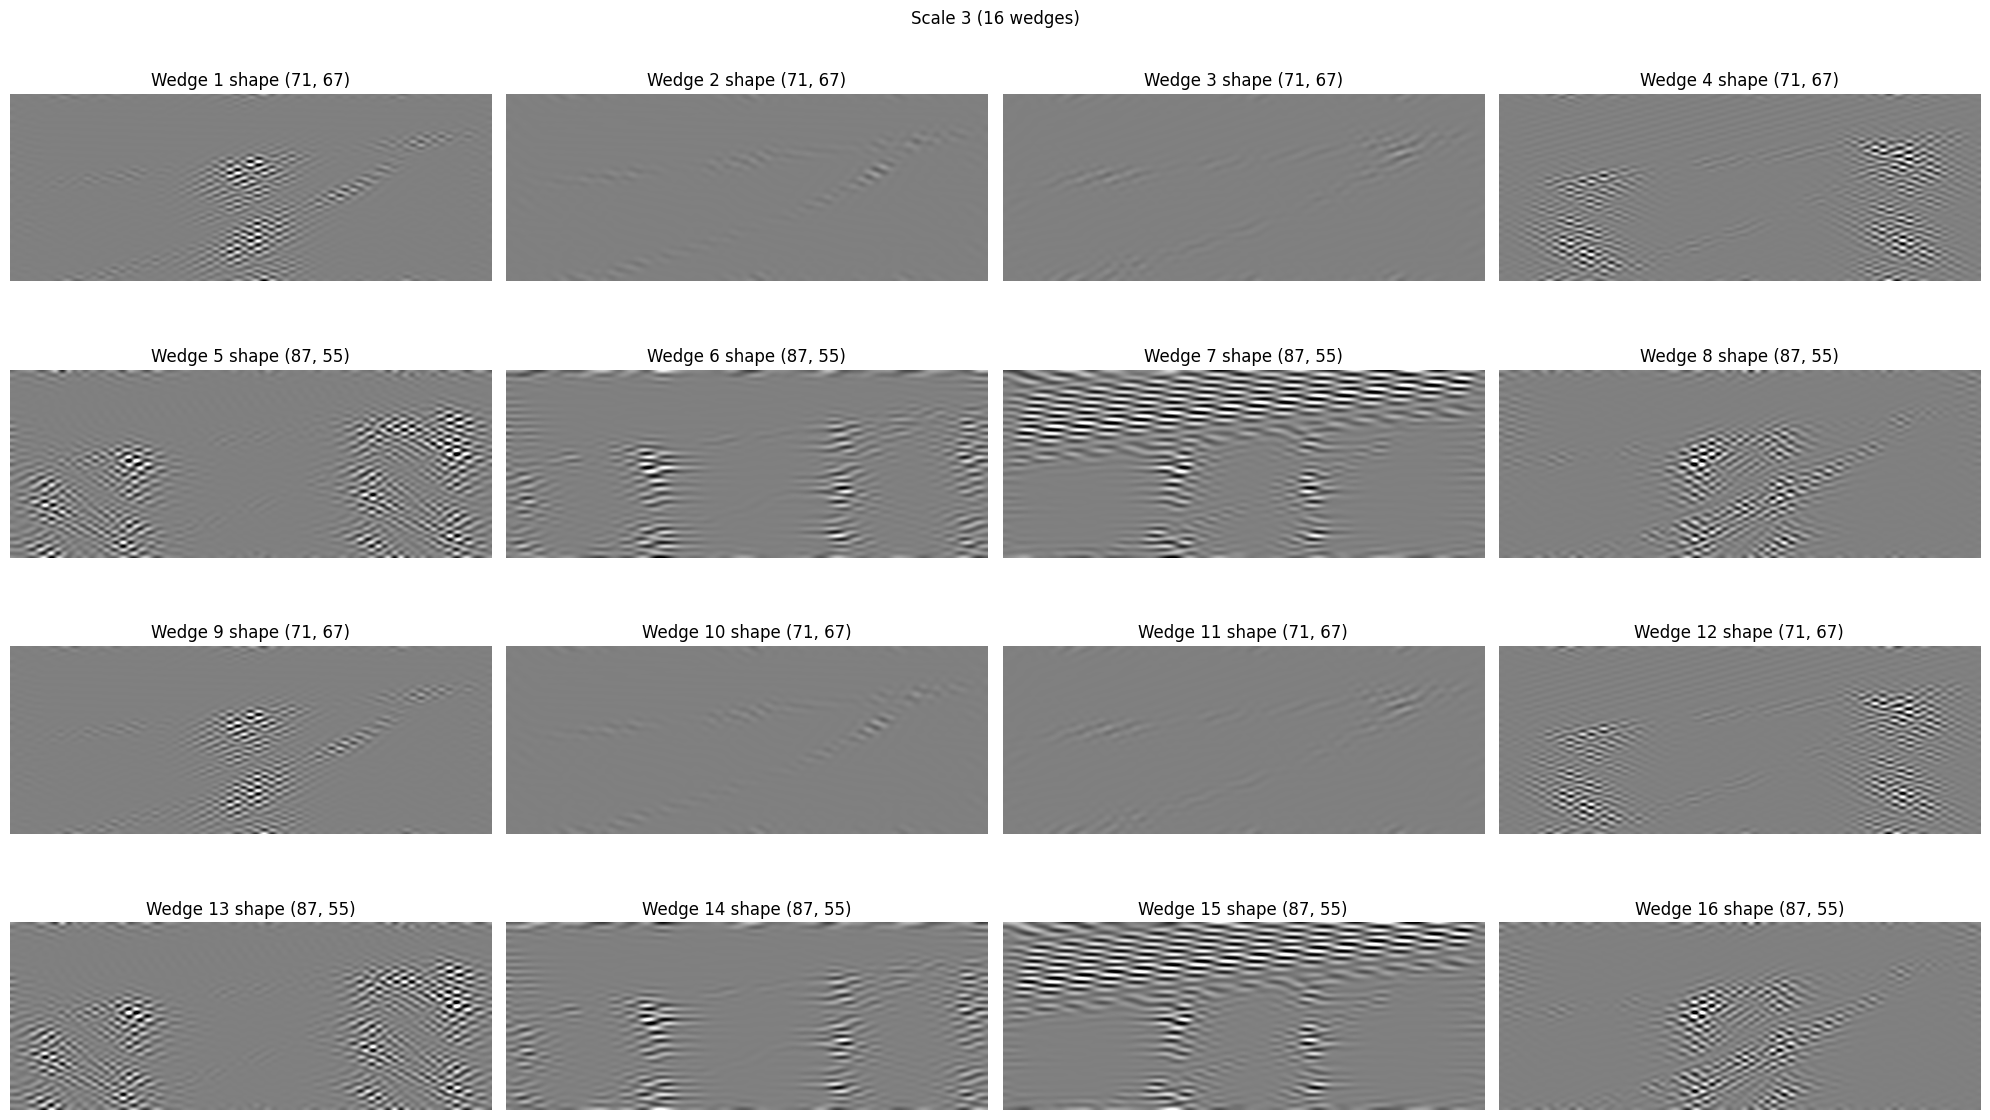

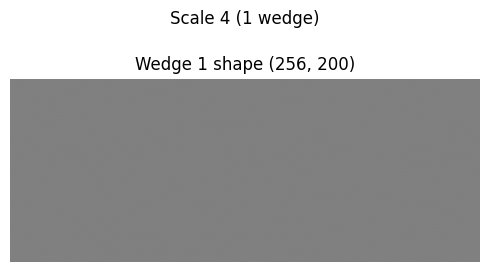

In [8]:
for j, fdct_scale in enumerate(d_fdct_struct, start=1):
    rows = int(np.floor(np.sqrt(len(fdct_scale))))
    fig, axes = plt.subplots(
        int(np.ceil(len(fdct_scale) / rows)),
        rows,
        figsize=(5 * rows, 3 * rows),
    )
    fig.suptitle(
        f"Scale {j} ({len(fdct_scale)} wedge{'s' if len(fdct_scale) > 1 else ''})"
    )
    axes = np.atleast_1d(axes).ravel()
    vmax = 0.5 * max(np.abs(Cweg).max() for Cweg in fdct_scale)
    for l, (fdct_wedge, ax) in enumerate(zip(fdct_scale, axes), start=1):
        # Note that wedges are transposed in comparison to the input vector. This is due
        # to the underlying implementation of the transform. In order to plot
        # in the same manner as the data, we must first transpose the wedge.
        # We will using the transpose of the wedge for visualization.
        c = fdct_wedge.imag.T
        ax.imshow(c.T, vmin=-vmax, vmax=vmax, **opts_plot)
        ax.set(title=f"Wedge {l} shape {c.shape}")
        ax.axis("off")
    fig.tight_layout()
